# Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statistics
from scipy.stats import poisson
from scipy.stats import binom

# Load the dataset

In [3]:
df=pd.read_csv("IRELAND_CRIME_GARDA_DIVISION_wise_2003-2019.csv",encoding='utf-8')

In [4]:
df.head()#show the first 5 rows

,REGION,GARDA DIVISION,OFFENCE CODE,OFFENCE,TYPE OF OFFENCE,2003Q1,2003Q2,2003Q3,2003Q4,2004Q1,...,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3
0,NORTHERN REGION,CAVAN/MONAGHAN,111,Murder,HOMICIDE OFFENCES,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,NORTHERN REGION,CAVAN/MONAGHAN,112,Manslaughter,HOMICIDE OFFENCES,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,NORTHERN REGION,CAVAN/MONAGHAN,113,Infanticide,HOMICIDE OFFENCES,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NORTHERN REGION,CAVAN/MONAGHAN,12,Dangerous driving leading to death,HOMICIDE OFFENCES,1,0,1,0,0,...,1,1,1,0,0,0,1,0,0,0
4,NORTHERN REGION,CAVAN/MONAGHAN,21,Rape and sexual assault,SEXUAL OFFENCES,24,15,5,5,14,...,16,8,14,23,21,13,23,19,20,17


In [5]:
#now drop the 2019 quarter because there is no quarter4
df.drop(['2019Q1','2019Q2','2019Q3'],axis=1)

,REGION,GARDA DIVISION,OFFENCE CODE,OFFENCE,TYPE OF OFFENCE,2003Q1,2003Q2,2003Q3,2003Q4,2004Q1,...,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4
0,NORTHERN REGION,CAVAN/MONAGHAN,111,Murder,HOMICIDE OFFENCES,0,0,0,0,0,...,4,0,0,0,0,1,0,0,1,0
1,NORTHERN REGION,CAVAN/MONAGHAN,112,Manslaughter,HOMICIDE OFFENCES,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,NORTHERN REGION,CAVAN/MONAGHAN,113,Infanticide,HOMICIDE OFFENCES,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NORTHERN REGION,CAVAN/MONAGHAN,12,Dangerous driving leading to death,HOMICIDE OFFENCES,1,0,1,0,0,...,1,0,1,1,1,1,0,0,0,1
4,NORTHERN REGION,CAVAN/MONAGHAN,21,Rape and sexual assault,SEXUAL OFFENCES,24,15,5,5,14,...,11,15,13,16,8,14,23,21,13,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,DUBLIN METROPOLITAN REGION,D.M.R. WESTERN,136,Social code offences (n.e.c.),PUBLIC ORDER AND OTHER SOCIAL CODE OFFENCES,8,5,6,6,7,...,7,2,5,8,5,3,10,4,5,5
1620,DUBLIN METROPOLITAN REGION,D.M.R. WESTERN,151,Offences against government and its agents,OFFENCES AGAINST GOVERNMENT/ JUSTICE PROCEDURE...,3,0,0,7,0,...,1,3,2,2,3,0,2,0,0,2
1621,DUBLIN METROPOLITAN REGION,D.M.R. WESTERN,152,Organisation of crime and conspiracy to commit...,OFFENCES AGAINST GOVERNMENT/ JUSTICE PROCEDURE...,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1622,DUBLIN METROPOLITAN REGION,D.M.R. WESTERN,153,Perverting the course of justice,OFFENCES AGAINST GOVERNMENT/ JUSTICE PROCEDURE...,2,1,0,1,2,...,2,1,0,1,2,1,0,1,0,0


In [6]:
#converting quarterly data into annual data
years=range(2003,2019)
#summing up the data for each year
for year in years:
    quarterly_columns=[f'{year}Q{i}' for i in range(1,5)]
    df[str(year)]=df[quarterly_columns].sum(axis=1)
#dropping the original quarterly columns
df.drop(columns=[col for col in df if 'Q' in col],inplace=True)
df.head()

,REGION,GARDA DIVISION,OFFENCE CODE,OFFENCE,TYPE OF OFFENCE,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,NORTHERN REGION,CAVAN/MONAGHAN,111,Murder,HOMICIDE OFFENCES,0,1,0,2,1,...,0,1,3,2,0,1,0,5,1,1
1,NORTHERN REGION,CAVAN/MONAGHAN,112,Manslaughter,HOMICIDE OFFENCES,0,0,1,0,0,...,0,0,0,1,2,0,0,0,0,2
2,NORTHERN REGION,CAVAN/MONAGHAN,113,Infanticide,HOMICIDE OFFENCES,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NORTHERN REGION,CAVAN/MONAGHAN,12,Dangerous driving leading to death,HOMICIDE OFFENCES,2,5,4,1,0,...,2,4,2,3,4,2,2,1,4,1
4,NORTHERN REGION,CAVAN/MONAGHAN,21,Rape and sexual assault,SEXUAL OFFENCES,49,38,47,41,32,...,46,114,47,52,47,40,57,56,51,80


In [7]:
#summing up the data for each year
for year in years:
    quarterly_coumns=[f'{year}Q{i}' for i in range(1,5)]
#selecting only coloumns that exist in dataframe
existing_quarters=[col for col in quarterly_columns if col in df.columns]
df[str(year)]=df[existing_quarters].sum(axis=1)
#dropping the original quarterely columns
df.drop(columns=[col for col in df if "Q" in col],inplace=True)
df.head()

,REGION,GARDA DIVISION,OFFENCE CODE,OFFENCE,TYPE OF OFFENCE,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,NORTHERN REGION,CAVAN/MONAGHAN,111,Murder,HOMICIDE OFFENCES,0,1,0,2,1,...,0,1,3,2,0,1,0,5,1,0.0
1,NORTHERN REGION,CAVAN/MONAGHAN,112,Manslaughter,HOMICIDE OFFENCES,0,0,1,0,0,...,0,0,0,1,2,0,0,0,0,0.0
2,NORTHERN REGION,CAVAN/MONAGHAN,113,Infanticide,HOMICIDE OFFENCES,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,NORTHERN REGION,CAVAN/MONAGHAN,12,Dangerous driving leading to death,HOMICIDE OFFENCES,2,5,4,1,0,...,2,4,2,3,4,2,2,1,4,0.0
4,NORTHERN REGION,CAVAN/MONAGHAN,21,Rape and sexual assault,SEXUAL OFFENCES,49,38,47,41,32,...,46,114,47,52,47,40,57,56,51,0.0


In [71]:
df.describe()

,OFFENCE CODE,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.00000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.0
mean,428.482759,141.754310,144.051108,156.788793,166.008621,175.556034,183.219212,175.496921,167.921798,158.54064,150.595443,140.775246,139.024015,138.557266,122.583744,131.614532,0.0
std,369.041033,398.524338,407.207567,425.530366,443.023060,456.870745,481.312857,458.670340,447.122852,429.21906,416.411016,396.884723,390.765197,385.684048,337.050704,363.861935,0.0
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,113.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
50%,411.500000,5.500000,5.000000,5.500000,7.000000,8.000000,10.000000,11.000000,10.000000,9.00000,8.500000,7.000000,8.000000,7.000000,7.000000,8.000000,0.0
75%,631.000000,69.250000,75.000000,80.000000,83.000000,95.250000,100.500000,106.000000,98.000000,93.00000,84.000000,78.250000,77.000000,74.250000,67.250000,76.250000,0.0
max,1221.000000,4809.000000,4364.000000,3979.000000,4159.000000,4140.000000,5151.000000,4280.000000,4264.000000,4681.00000,5120.000000,5433.000000,5258.000000,4876.000000,4263.000000,4996.000000,0.0


In [9]:
descriptive_df=df.describe().transpose()
mode_values=df.mode().iloc[0]
descriptive_df['mode']=mode_values
descriptive_df[['mode']]

,mode
OFFENCE CODE,111.0
2003,0.0
2004,0.0
2005,0.0
2006,0.0
2007,0.0
2008,0.0
2009,0.0
2010,0.0
2011,0.0


In [10]:
df.isnull().sum()#missing values

REGION             0
GARDA DIVISION     0
OFFENCE CODE       0
OFFENCE            0
TYPE OF OFFENCE    0
2003               0
2004               0
2005               0
2006               0
2007               0
2008               0
2009               0
2010               0
2011               0
2012               0
2013               0
2014               0
2015               0
2016               0
2017               0
2018               0
dtype: int64

# Data visualization
- bar chart for crime categories
- time series plot for crime trends
- heatmap for regional crime distribution

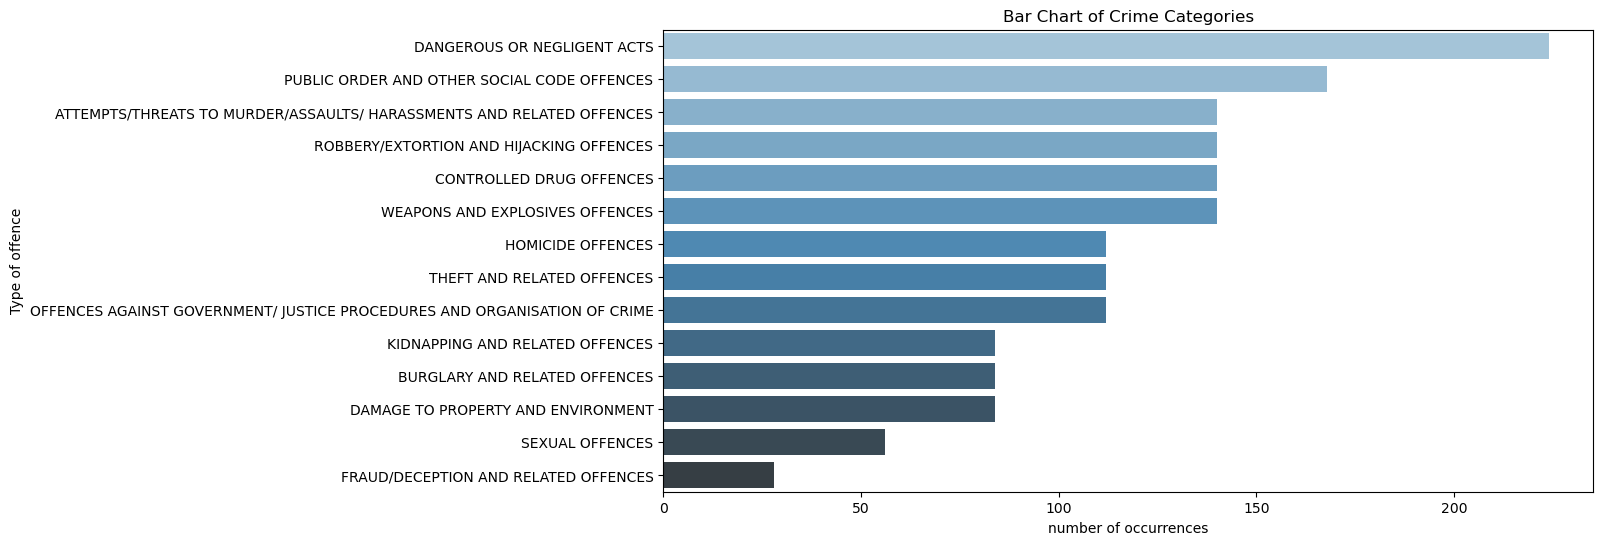

In [11]:
# bar chart for crime categories
plt.figure(figsize=(12,6))
categories=df["TYPE OF OFFENCE"].value_counts()
sns.barplot(x=categories.values,y=categories.index,palette="Blues_d")
plt.title("Bar Chart of Crime Categories")
plt.xlabel("number of occurrences")
plt.ylabel("Type of offence")
plt.show()


The bar chart represent the clear view of different types of offences. some categories are much more common than others.It means it require more  attention or resources

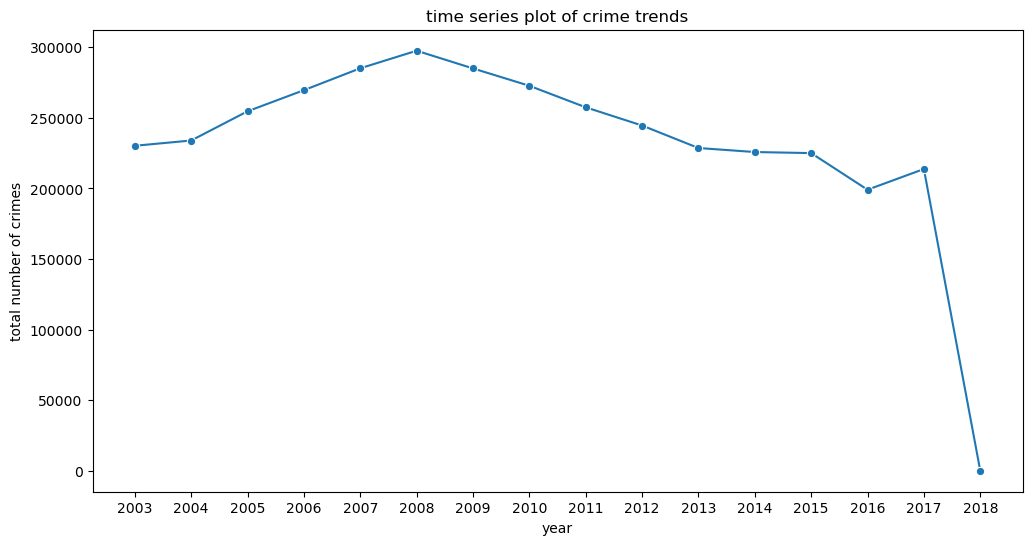

In [12]:
year_columns=[str(year) for year in years]
plt.figure(figsize=(12,6))
annual_totals=df[year_columns].sum()
sns.lineplot(data=annual_totals,marker='o')
plt.title("time series plot of crime trends")
plt.xlabel("year")
plt.ylabel("total number of crimes")
plt.show()

The time series plot shows the overall trend of crimes over the years.this shows that in 2003 the total number of crimes are between 200000 to 250000 than in 2008 it shows that it is on peak.

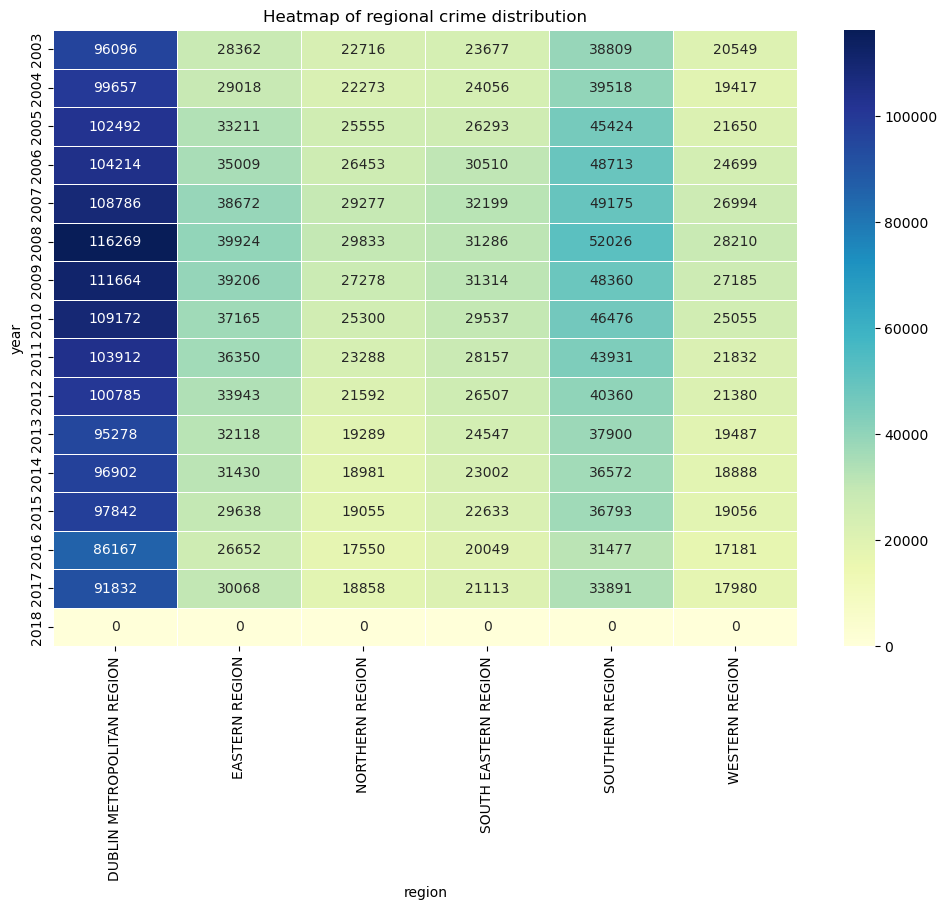

In [13]:
#heatmap for regional crime distribution
#aggeragating data by region
region_total_year=df.groupby("REGION")[year_columns].sum().T.astype(int)
plt.figure(figsize=(12,8))
sns.heatmap(region_total_year,cmap="YlGnBu",annot=True,fmt='d',linewidths=.5)
plt.title("Heatmap of regional crime distribution")
plt.xlabel("region")
plt.ylabel("year")
plt.show()

The heatmap represents that how crime is distributed in different regions over the years. the dark blue represent that the crime is highest in the dublin metropolitan region

# Discrete Distribution
- Poission distribution
- Binomial distribution

In [14]:
#selecting the crime type for Binomial and poission
#for Binomial Distribution consider the specific type of crime as a success
#for poission distribution analyze the occurance of crime over the year
common_crime_type=df["TYPE OF OFFENCE"].value_counts().idxmax()
poission_data=df[df["TYPE OF OFFENCE"]==common_crime_type][year_columns].sum()
poission_data.head()

2003    11961.0
2004    12669.0
2005    14705.0
2006    19198.0
2007    20730.0
dtype: float64

In [15]:
#poisson distribution Analysis
#calculating mean 
lambda_poisson=poission_data.mean()
#generating poisson distribution with the calculated mean
poisson_dist=poisson(mu=lambda_poisson)
poisson_pmfs=poisson_dist.pmf(poission_data.values)


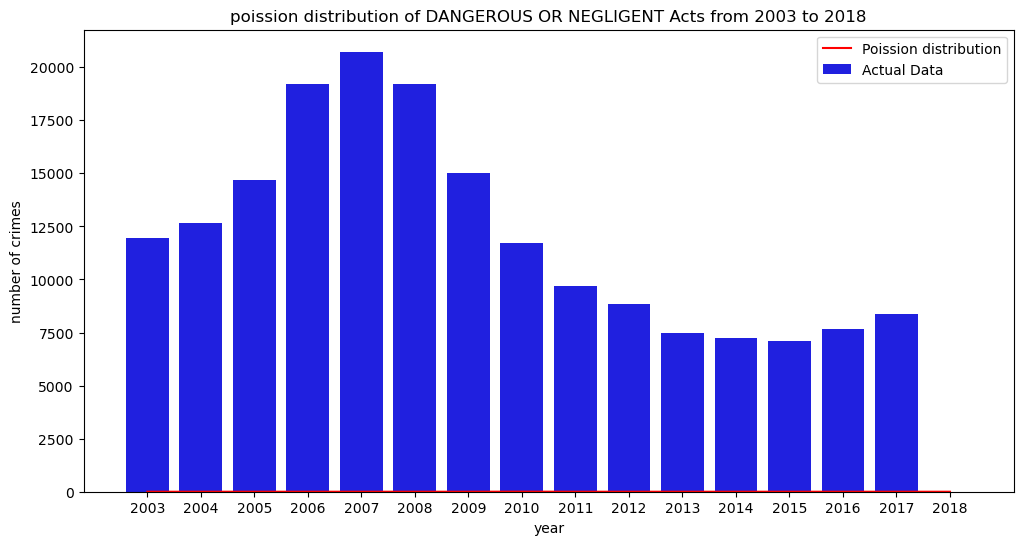

In [16]:
#plotting the poisson distribution
plt.figure(figsize=(12,6))
sns.barplot(x=poission_data.index,y=poission_data.values,color="blue",label="Actual Data")
sns.lineplot(x=poission_data.index,y=poisson_pmfs*poission_data.sum() ,color="red",label="Poission distribution")
plt.title("poission distribution of DANGEROUS OR NEGLIGENT Acts from 2003 to 2018")
plt.xlabel("year")
plt.ylabel("number of crimes")
plt.legend()
plt.show()

1. In this the blue bar represents the actual number of dangerous or negilence acts reported per year
2. And the red line represents the poission distribution fit
3. We choose the Dangerous or negligent acts as a crime type because it is the most common type of crime in the dataset according to the bar chart of crime categories which we earlier visualize on the bar chart

# Binomial Distribution
for binomial distribution we could use the context "success" as a occurence of "dangerous or Negligent Acts" and trials could be total number of crimes reported in each year

In [17]:
#calculating the total number of crimes each year
total_crimes_per_year=df[year_columns].sum()
#calculating the probability
probability=poission_data/total_crimes_per_year
#assuming number of trials(total crimes) and calculating the pmf
binomial_distribution=[binom(n=total,p=prob)for total,prob in zip(total_crimes_per_year,probability)]


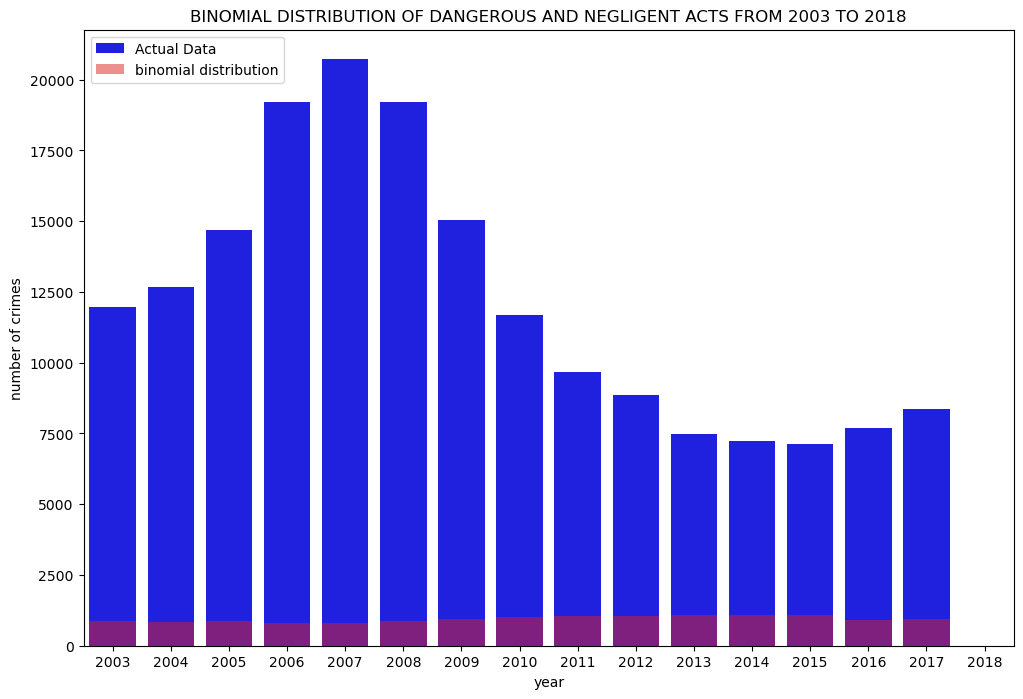

In [179]:
#plotting the figure
plt.figure(figsize=(12,8))
sns.barplot(x=poission_data.index,y=poission_data.values,color="blue",label="Actual Data")
#calculating pmfs for each year
binom_pmf_values=[binom_dist.pmf(poission_data[year])*total_crimes_per_year[year] for year, binom_dist in zip(poission_data.index, binomial_distribution)]
sns.barplot(x=poission_data.index,y=binom_pmf_values,color="red",alpha=0.5,label="binomial distribution")
plt.title("BINOMIAL DISTRIBUTION OF DANGEROUS AND NEGLIGENT ACTS FROM 2003 TO 2018")
plt.xlabel("year")
plt.ylabel("number of crimes")
plt.legend()
plt.show()

1. The blue bars represent the actual number of dangerous or negligence acts reported each year
2. The red one represent the binomial distibution fit for each year.
3. The binomial distribution represent that each crime is independent with a similar probabilty of occurrence.

# machine learning

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# feature Engineering

# Decision tree classifier

In [85]:
features=["REGION","GARDA DIVISION"]+[str(year)for year in years]
target = 'TYPE OF OFFENCE'
df[features + [target]].head()


,REGION,GARDA DIVISION,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,TYPE OF OFFENCE
0,NORTHERN REGION,CAVAN/MONAGHAN,0,1,0,2,1,1,0,1,3,2,0,1,0,5,1,0.0,HOMICIDE OFFENCES
1,NORTHERN REGION,CAVAN/MONAGHAN,0,0,1,0,0,0,0,0,0,1,2,0,0,0,0,0.0,HOMICIDE OFFENCES
2,NORTHERN REGION,CAVAN/MONAGHAN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,HOMICIDE OFFENCES
3,NORTHERN REGION,CAVAN/MONAGHAN,2,5,4,1,0,2,2,4,2,3,4,2,2,1,4,0.0,HOMICIDE OFFENCES
4,NORTHERN REGION,CAVAN/MONAGHAN,49,38,47,41,32,37,46,114,47,52,47,40,57,56,51,0.0,SEXUAL OFFENCES


In [86]:
# Encoding categorical variables using get_dummies (one-hot encoding)
encoded_df = pd.get_dummies(df[features + [target]], drop_first=True)

In [87]:
#separating the features and the target variable
X=encoded_df.drop(columns=[col for col in encoded_df.columns if "TYPE OF OFFENCE" in col])
y=df["TYPE OF OFFENCE"]

In [88]:
#splitting the data into training and testing 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [89]:
#training the decision tree classifier
dt_classifier=DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [90]:
#predicting the test set results
y_pred=dt_classifier.predict(X_test)

In [91]:
#evaluating the model
accuracy=accuracy_score(y_test,y_pred)
classification_rep=classification_report(y_test,y_pred)

In [92]:
accuracy

0.27459016393442626

In [93]:
classification_rep

'                                                                           precision    recall  f1-score   support\n\n    ATTEMPTS/THREATS TO MURDER/ASSAULTS/ HARASSMENTS AND RELATED OFFENCES       0.39      0.48      0.43        46\n                                            BURGLARY AND RELATED OFFENCES       0.18      0.20      0.19        25\n                                                 CONTROLLED DRUG OFFENCES       0.17      0.31      0.22        29\n                                       DAMAGE TO PROPERTY AND ENVIRONMENT       0.16      0.21      0.18        24\n                                              DANGEROUS OR NEGLIGENT ACTS       0.30      0.19      0.24        73\n                                     FRAUD/DECEPTION AND RELATED OFFENCES       0.22      0.18      0.20        11\n                                                        HOMICIDE OFFENCES       0.21      0.26      0.23        31\n                                          KIDNAPPING AND RELATED OFFE

The decision tree classifier achieved an accuracy of approx 27.45%

# Random forest classifier

In [94]:
#training the random forest
rf_classifier=RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [95]:
#predicting the test set results with the random forest 
y_pred_rf=rf_classifier.predict(X_test)

In [96]:
#evaluating the random forest
accuracy=accuracy_score(y_test,y_pred_rf)
classification_rep_rf=classification_report(y_test,y_pred_rf)

In [97]:
accuracy

0.3729508196721312

In [98]:
classification_rep_rf

'                                                                           precision    recall  f1-score   support\n\n    ATTEMPTS/THREATS TO MURDER/ASSAULTS/ HARASSMENTS AND RELATED OFFENCES       0.49      0.59      0.53        46\n                                            BURGLARY AND RELATED OFFENCES       0.29      0.16      0.21        25\n                                                 CONTROLLED DRUG OFFENCES       0.33      0.55      0.41        29\n                                       DAMAGE TO PROPERTY AND ENVIRONMENT       0.25      0.17      0.20        24\n                                              DANGEROUS OR NEGLIGENT ACTS       0.33      0.37      0.35        73\n                                     FRAUD/DECEPTION AND RELATED OFFENCES       0.43      0.27      0.33        11\n                                                        HOMICIDE OFFENCES       0.22      0.35      0.27        31\n                                          KIDNAPPING AND RELATED OFFE

the random forest shows the accuracy of 36% which is slightly improvement from decision tree

# Hyperparameter tuning for random forest
- using Grid Search Cv

In [99]:
# One-hot encoding and feature/target separation
encoded_df = pd.get_dummies(df[features + [target]], drop_first=True)
X = encoded_df.drop(columns=[col for col in encoded_df.columns if 'TYPE OF OFFENCE' in col])
y = df[target]

In [100]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
# Simplified Grid Search for Random Forest
simplified_param_grid_rf = {'n_estimators': [100, 50],'max_depth': [None, 10]} 
# Fewer options for number of trees
# Limiting the maximum depth of the tree
  

In [102]:
# Creating the Grid Search with the simplified parameter grid
simplified_grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),param_grid=simplified_param_grid_rf,cv=3,n_jobs=-1,verbose=2)
#3 folds cross validation
#Use all available cores

In [103]:
# Fitting the grid search to the data
simplified_grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'n_estimators': [100, 50]},
             verbose=2)

In [105]:
# Best parameters and accuracy score
best_params_simplified_rf = simplified_grid_search_rf.best_params_
best_score_simplified_rf = simplified_grid_search_rf.best_score_

In [106]:
best_params_simplified_rf, best_score_simplified_rf

({'max_depth': 10, 'n_estimators': 100}, 0.35334872979214776)

The simplifed Grid search for random forest classifier has shown that maximum depth of the tree in random forest is 10 it means that each decision tree will be divided into 10 levels deep. it means that each tree will make decision based on maximum 10 questions. we have limited the depth of the tree for not becoming too complex. the next parameter consists of n estimator means 100 individual tree.Each tree will independently learn from the data and make decision.the next part is best score which represent the model accuracy.it shows that 35.33% are correctly predicted the type of offences.
n-estimator=100 
best score =35.33%